#Theoritical

###1 What is K-Nearest Neighbors (KNN) and how does it work

KNN is a simple algorithm based on the idea that similar data points tend to stay together in the feature space.
KNN does not train model, it predicts using that stored data at runtime.
KNN computes the distance of a new data point from all the other data points.Based on the distance K nearest data points are found.

For classification majority vote of the nearest K data points determine the prediction class

For regression the average of the K nearest data points, becomes the prediction

###2 What is the difference between KNN Classification and KNN Regression

KNN computes the distance of a new data point from all the other data points.Based on the distance K nearest data points are found.

For classification majority vote of the nearest K data points determine the prediction class

For regression the average of the K nearest data points, becomes the prediction

###3 What is the role of the distance metric in KNN
KNN computes the distance of a new data point from all the other data points.Based on the distance K nearest data points are found.
Distance can be calculated using euclidean disatance,Manhattan distance or Minkowski(generalised form0


###4 What is the Curse of Dimensionality in KNN
 Increased dimension craetes challenges to calculate the distance & find the nearest neighbours

 - Increase computation cost
 - Data becomes nearly equidistant
 - overfitting risk increases
 - data becomes sparse, more spread out in the feature space.This makes finding meaningful neighbours difficult


###5 How can we choose the best value of K in KNN
- Cross validation to find the best parameter
- Elbow method
- Choose odd number of K for binary classification to avoid ties
- Domain knowledge
- Large K smoothens the decision boundary
- Small K is sensitive to local pattern and outliers


###6 What are KD Tree and Ball Tree in KNN

Speeds up the k nearest neighbour search
K-D tree
  - constructs a binary tree by splitting the data recursively
Ball Tree
  - Constructs balls with nearest data without doing any axis wise partition

###7 When should you use KD Tree vs. Ball Tree

KD Tree is good for low( < 30) dimension dataset & where eucledian distance is used.
Preferred for geospatial data, image recognition, and search algorithms.

Ball tree is good for high dimension( > 30 ) datsets. Works with any distance metrics.Good for sparsed or clustered data, where boundaries are not axis alligned.
Used for text based applications, genomics.

###8 What are the disadvantages of KNN

- Curse of dimensionality
- Computationally expensive
- Performs the task at runtime, requires memory for storage
- Needs sclaing
- Sensitive to noise or irrelvant features

###9 How does feature scaling affect KNN

KNN uses distance as metric to determine nearest data points.
Feature with larger values will dominate the distance computation.

###10 What is PCA (Principal Component Analysis)
Statistical technique to reduce the dimension. It preserves the variance as much as possible.It transforms a datset with multiple correlated variables into a smaller set of uncorrelated variables called principal components.

###11 How does PCA work
Step1 Standardize the data, to have the data in the same scale
Step2 Compute the covariance matrix for all the variables/features
Step3 Calculate Eigen vectors and eigen values. Eigen vectors indicate the direction of maximum variance, eigen values finds the magnitude of the variation
Step4 The components with the highest eigen values capture the maximum variance
Step5 The original datset is projected into the projectd into the selected principal components, reducing the dimension


###12 What is the geometric intuition behind PCA

Finding new axes that retains the maximum variance. PCA rotates the axes to find the best direction. PCA then projects the data onto the new axes

###13 What are Eigenvalues and Eigenvectors in PCA
Eigen vectors indicate the direction of maximum variance, eigen values finds the magnitude of the variation

###14 What is the difference between Feature Selection and Feature Extraction

Feature selection selects the most relevant features without modifying them
Feature extraction perfroms liner atransformation to capture the maximum variance in the principal components.

###15 How do you decide the number of components to keep in PCA

 - Plot the cummulative variance and observe the elbow point, beyond which number of increase in PC doesnot increase the accuracy
  - 95% of the variance should be retained
  - Retain PC with eigen value >=1
  - Reconstruct the data and measure the MSE. Lower reconstruction error means better
  - Cross validation can be used to identify the best PC

###16 Can PCA be used for classification

PCA can be used before performing classification algorithms for better performance

###17 What are the limitations of PCA
  - Not robust to outliers
  - Choosing right number of PC can be tricky
  - Loses information for some patterns
  - Doesnot work well when variance is spread across all axis

###18 How do KNN and PCA complement each other

PCA can be performed before KNN to
- reduce dimensions
- better interpretability
- reduce noise
- improves computation efficiency

###19 How does KNN handle missing values in a dataset

Using KNN imputer most similar datapoint can be found from the neighbours. The average or most frequent data can be used to replace the missing data

###20 What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

PCA
- Maximizes the variance
- unsupervised
- reduces dimension

LDA
- maximizes separation between classes
- supervised
- Improves classification accuracy

#Practical

In [ ]:
###21 Train a KNN Classifier on the Iris dataset and print model accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

X,y = load_iris(return_X_y=True)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = KNeighborsClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy {accuracy_score(y_test,y_pred)}")

Accuracy 1.0


In [ ]:
###22 Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

warnings.filterwarnings('ignore')

X,y = make_regression(n_features=20,n_samples=1000,noise=0.1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = KNeighborsRegressor()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)} R2:{r2_score(y_test,y_pred)}")

Mean Squared Error: 12665.097068958763 R2:0.5870772566851765


In [ ]:
###23 Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

X,y = load_iris(return_X_y=True)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf_manhattan = KNeighborsClassifier(metric='minkowski',p=1)
clf_euclidean = KNeighborsClassifier(metric='minkowski',p=2)

clf_manhattan.fit(X_train,y_train)
y_manhattan_pred = clf_manhattan.predict(X_test)

clf_euclidean.fit(X_train,y_train)
y_euclidean_pred = clf_euclidean.predict(X_test)

print(f"Manhattan Accuracy {accuracy_score(y_test,y_manhattan_pred)}")
print(f"Euclidean Accuracy {accuracy_score(y_test,y_euclidean_pred)}")

Manhattan Accuracy 1.0
Euclidean Accuracy 1.0


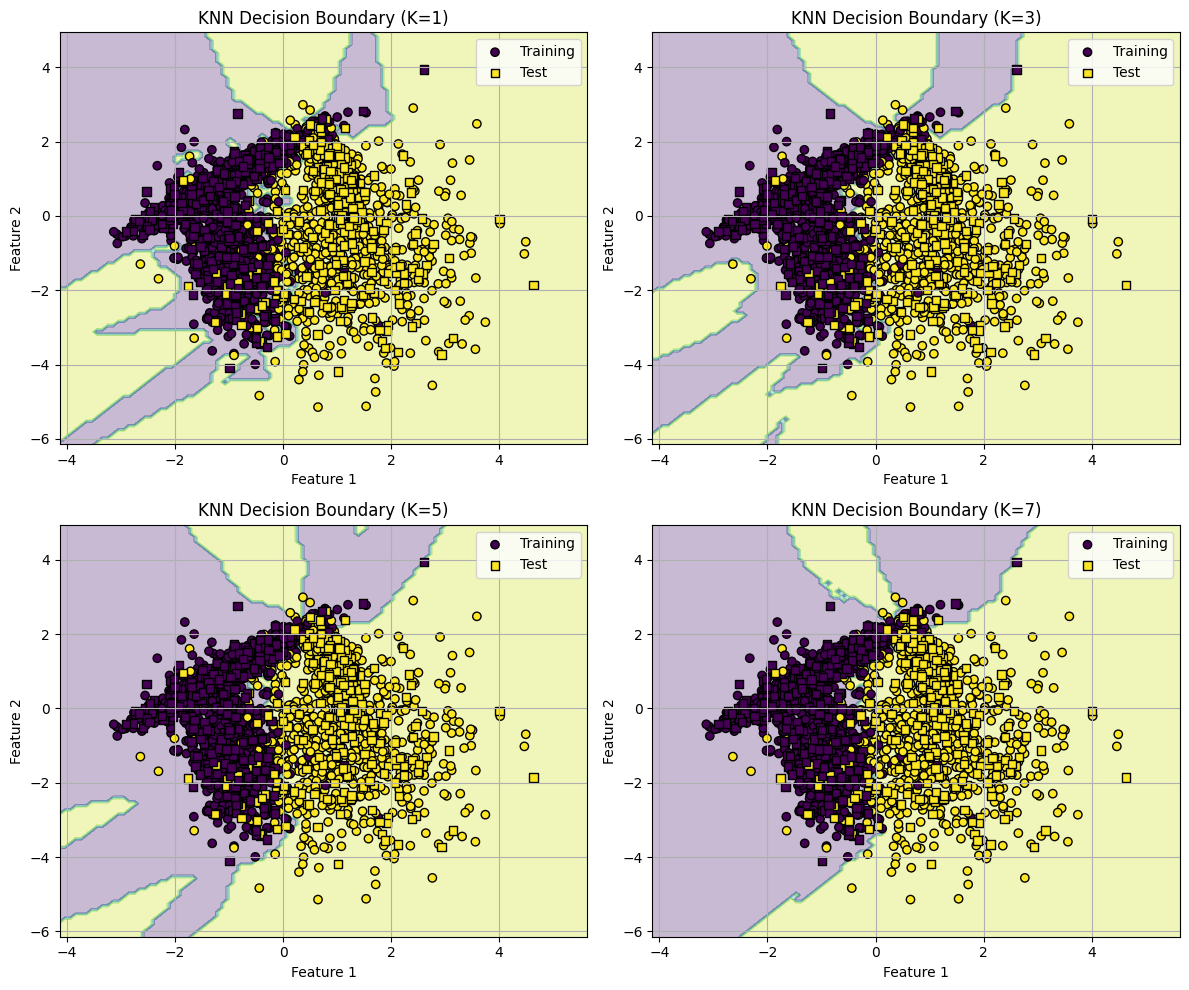

In [ ]:
###24 Train a KNN Classifier with different values of K and visualize decision boundaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

X,y = make_classification(n_features=2,n_samples=3000,n_redundant=0)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

k_values = [1,3,5,7]
plt.figure(figsize=(12, 10))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

for i, k in enumerate(k_values):
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train,y_train)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.subplot(2, 2, i+1)
  plt.contourf(xx, yy, Z, alpha=0.3)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label="Training")
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label="Test")
  plt.title(f'KNN Decision Boundary (K={k})')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
###25. Apply Feature Scaling before training a KNN model and compare results with unscaled data


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

X,y = make_classification(n_features=2,n_samples=3000,n_redundant=0)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier(n_neighbors=5)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy before sclaing: {accuracy_score(y_test,y_pred)}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy with scaling: {accuracy_scaled:.4f}")



Accuracy before sclaing: 0.9766666666666667
Accuracy with scaling: 0.9750


In [ ]:
###26.  Train a PCA model on synthetic data and print the explained variance ratio for each component

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

X,y = make_classification(n_samples=2000,n_features=5,n_redundant=1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Explained variance ratio {pca.explained_variance_ratio_}")

Explained variance ratio [0.44579708 0.20669049 0.19340192 0.1541105  0.        ]


Accuracy before PCA 0.9


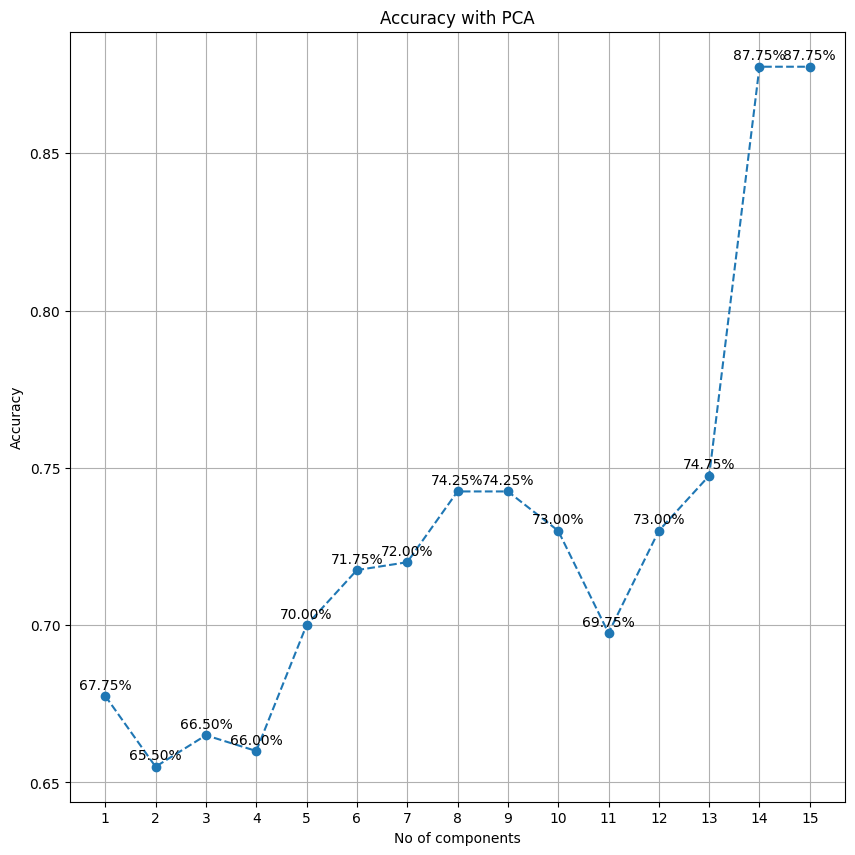

In [ ]:
###27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

X,y = make_classification(n_samples=2000,n_features=15,n_redundant=1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#KNN before PCA
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(f"Accuracy before PCA {accuracy_score(y_test,y_pred)}")

#Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#PCA
components = range(1,16)
accuracy =[]

for i in components:
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)

  #KNN after PCA
  clf = KNeighborsClassifier(n_neighbors=5)
  clf.fit(X_train_pca,y_train)

  y_pred_pca = clf.predict(X_test_pca)
  #print(f"Accuracy after PCA with {i} components {accuracy_score(y_test,y_pred_pca)}")
  accuracy.append(accuracy_score(y_test,y_pred_pca))

plt.figure(figsize=(10,10))
plt.plot(components,accuracy,marker='o',linestyle='--')
plt.title('Accuracy with PCA')
plt.xlabel('No of components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(components)
for i, txt in enumerate(accuracy):
    plt.annotate(f'{txt:.2%}', (components[i], accuracy[i]), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()

In [ ]:
###28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

X,y = load_iris(return_X_y=True)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = KNeighborsClassifier()
param ={
   'n_neighbors'  : [1,2,3,4,5],
   'weights' : ['uniform', 'distance'],
   'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
   'leaf_size': [2,3,5],
   'metric': ['minkowski'],
   'p': [1,2]
}
grid = GridSearchCV(estimator =clf,param_grid=param,verbose=0,cv=5)

grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best params: {'algorithm': 'ball_tree', 'leaf_size': 2, 'metric': 'minkowski', 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
Best score: 0.9833333333333334


In [ ]:
###29. Train a KNN Classifier and check the number of misclassified samples

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

warnings.filterwarnings('ignore')

X,y = load_iris(return_X_y=True)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = KNeighborsClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy {accuracy_score(y_test,y_pred)}")
print(f"Number of misclassified samples {(y_test!=y_pred).sum()}")
print(f"Confusion Matrix: \n\n {confusion_matrix(y_test,y_pred)}")

Accuracy 1.0
Number of misclassified samples 0
Confusion Matrix: 

 [[11  0  0]
 [ 0  6  0]
 [ 0  0 13]]


[0.39491547 0.60033166 0.80220955 1.         1.        ]
range(1, 6)


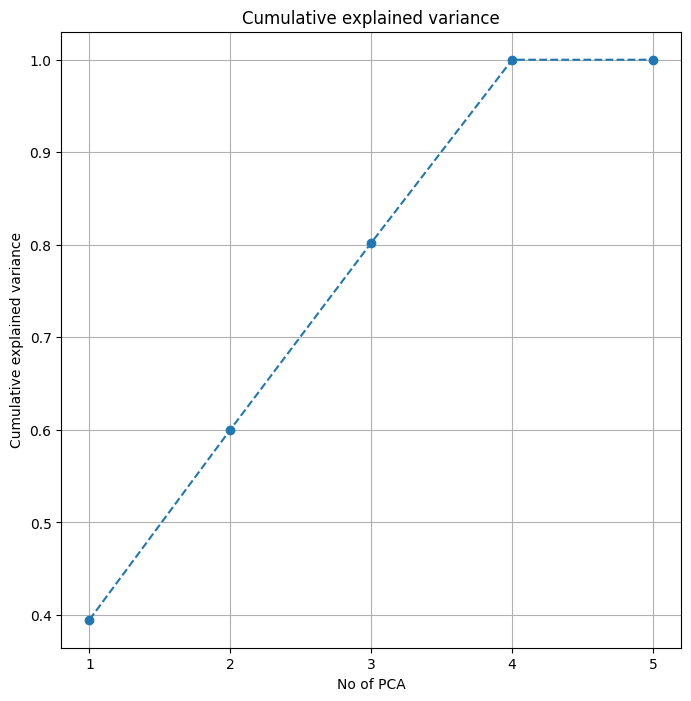

In [ ]:
###30. Train a PCA model and visualize the cumulative explained variance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

X,y = make_classification(n_samples=2000,n_features=5,n_redundant=1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance)
print(range(1,len(explained_variance)+1))

plt.figure(figsize=(8,8))
plt.plot(range(1,len(explained_variance)+1),explained_variance,marker='o',linestyle='--')
plt.title("Cumulative explained variance")
plt.grid(True)
plt.xlabel('No of PCA')
plt.xticks(range(1,len(explained_variance)+1))
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
###31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

X,y = load_iris(return_X_y=True)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf_uniform = KNeighborsClassifier(weights='uniform')
clf_distance = KNeighborsClassifier(weights='distance')

clf_uniform.fit(X_train,y_train)
y_uniform_pred = clf_uniform.predict(X_test)

clf_distance.fit(X_train,y_train)
y_distance_pred = clf_distance.predict(X_test)

print(f"Uniform weight Accuracy {accuracy_score(y_test,y_uniform_pred)}")
print(f"Distance weight Accuracy {accuracy_score(y_test,y_distance_pred)}")

Uniform weight Accuracy 0.9666666666666667
Distance weight Accuracy 0.9666666666666667


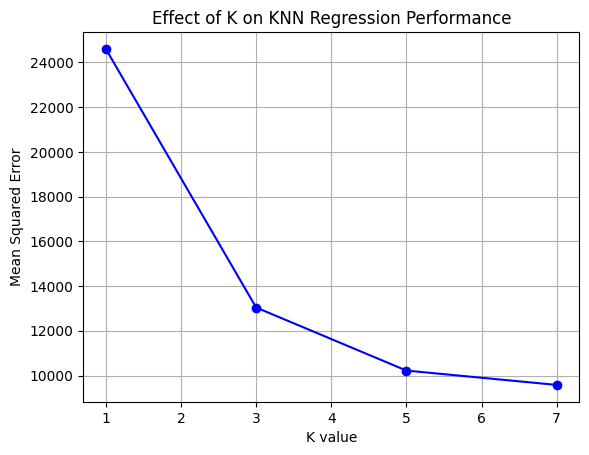

In [ ]:
###32. Train a KNN Regressor and analyze the effect of different K values on performance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

warnings.filterwarnings('ignore')

X,y = make_regression(n_features=20,n_samples=1000,noise=0.1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

k_values = [1,3,5,7]
errors = {}

for k in k_values:
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors[k] = mse

plt.plot(k_values, list(errors.values()), marker='o', linestyle='-', color='b')
plt.xlabel('K value')
plt.ylabel('Mean Squared Error')
plt.title('Effect of K on KNN Regression Performance')
plt.grid(True)
plt.show()

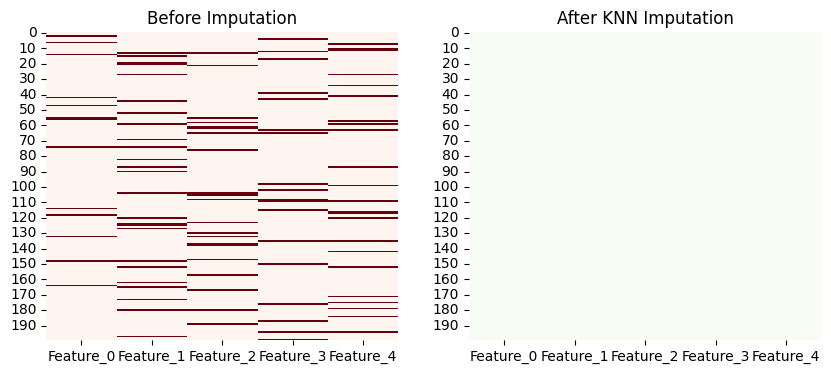

In [ ]:
###33.  Implement KNN Imputation for handling missing values in a dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import KNNImputer
from sklearn.datasets import make_classification

warnings.filterwarnings('ignore')

X, y = make_classification(n_samples=200, n_features=5, random_state=42)
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])

np.random.seed(42)
missing_rate = 0.1
missing_indices = np.random.choice(df.size, int(df.size * missing_rate), replace=False)
df.values.ravel()[missing_indices] = np.nan


knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Before Imputation")

plt.subplot(1,2,2)
sns.heatmap(df_imputed.isnull(), cbar=False, cmap='Greens')
plt.title("After KNN Imputation")

plt.show()


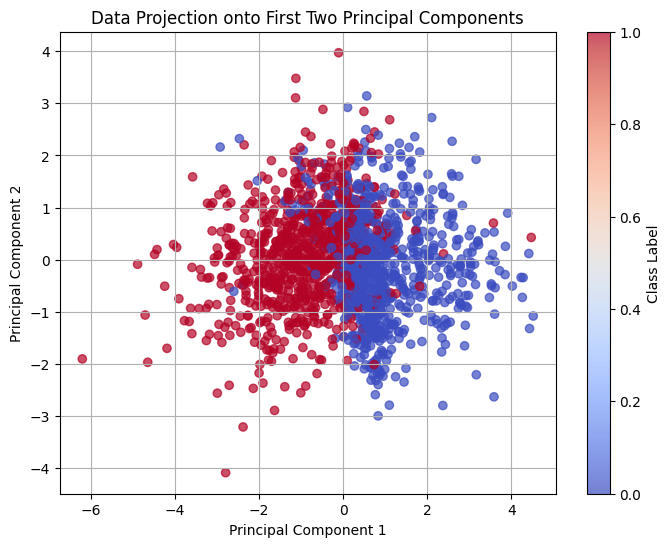

In [ ]:
###34. Train a PCA model and visualize the data projection onto the first two principal components

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

X,y = make_classification(n_samples=2000,n_features=5,n_redundant=1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data Projection onto First Two Principal Components")
plt.colorbar(label="Class Label")
plt.grid(True)
plt.show()

In [ ]:
###35.  Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

X,y = load_iris(return_X_y=True)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

algorithms = ['ball_tree','kd_tree']

for algorithm in algorithms:
  clf = KNeighborsClassifier(algorithm=algorithm,n_neighbors=5)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(f"Algorithm {algorithm}, Accuracy {accuracy_score(y_test,y_pred)}")

Algorithm ball_tree, Accuracy 0.9333333333333333
Algorithm kd_tree, Accuracy 0.9333333333333333


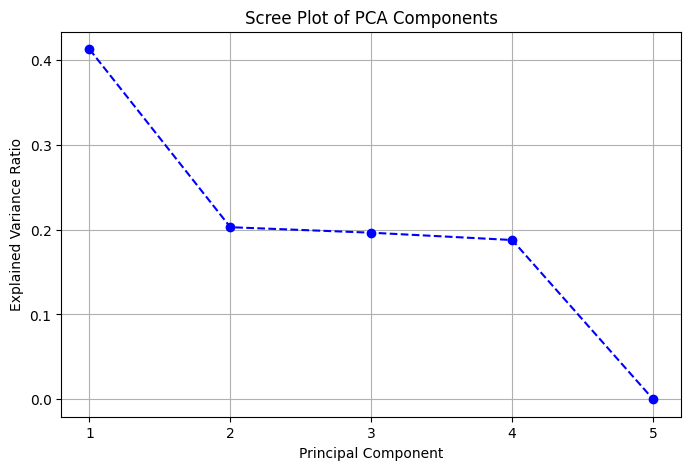

In [ ]:
###36.  Train a PCA model on a high-dimensional dataset and visualize the Scree plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

X,y = make_classification(n_samples=2000,n_features=5,n_redundant=1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA Components')
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.grid(True)
plt.show()

In [ ]:
###37.  Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

warnings.filterwarnings('ignore')

X,y = load_iris(return_X_y=True)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = KNeighborsClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667
F1-Score: 0.9666


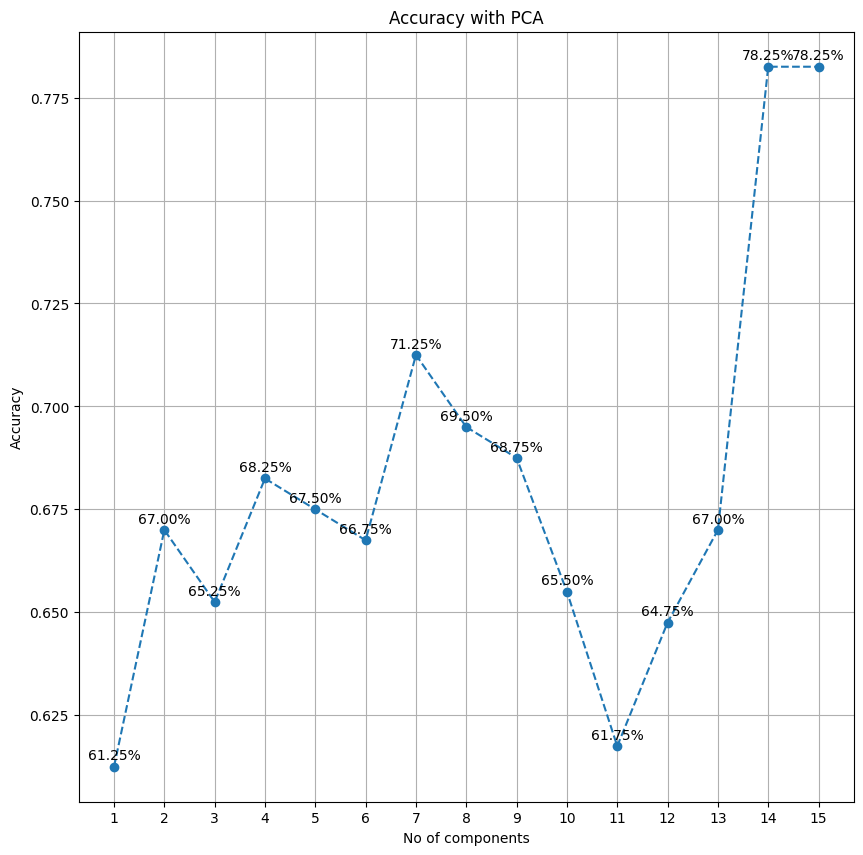

In [ ]:
###38.  Train a PCA model and analyze the effect of different numbers of components on accuracy


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

X,y = make_classification(n_samples=2000,n_features=15,n_redundant=1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#PCA
components = range(1,16)
accuracy =[]

for i in components:
  pca = PCA(n_components=i)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)

  #KNN after PCA
  clf = KNeighborsClassifier(n_neighbors=5)
  clf.fit(X_train_pca,y_train)

  y_pred_pca = clf.predict(X_test_pca)
  #print(f"Accuracy after PCA with {i} components {accuracy_score(y_test,y_pred_pca)}")
  accuracy.append(accuracy_score(y_test,y_pred_pca))

plt.figure(figsize=(10,10))
plt.plot(components,accuracy,marker='o',linestyle='--')
plt.title('Accuracy with PCA')
plt.xlabel('No of components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(components)
for i, txt in enumerate(accuracy):
    plt.annotate(f'{txt:.2%}', (components[i], accuracy[i]), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()

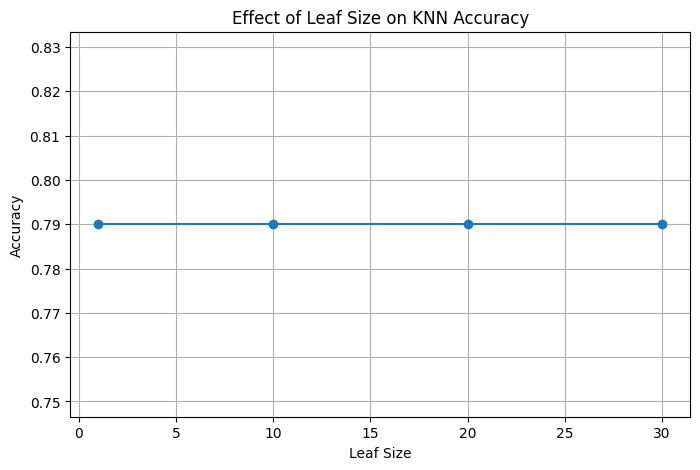

In [ ]:
###39.  Train a KNN Classifier with different leaf_size values and compare accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

X,y = make_classification(n_samples=2000,n_features=30,n_redundant=1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
leaf_size = [1,10,20,30]
accuracy_results={}
for leaf in leaf_size:
  clf = KNeighborsClassifier(leaf_size=leaf,algorithm='ball_tree',n_neighbors=5)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy_results[leaf]=accuracy_score(y_test,y_pred)

plt.figure(figsize=(8, 5))
plt.plot(leaf_size, list(accuracy_results.values()), marker='o', linestyle='-')
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy")
plt.title("Effect of Leaf Size on KNN Accuracy")
plt.grid()
plt.show()

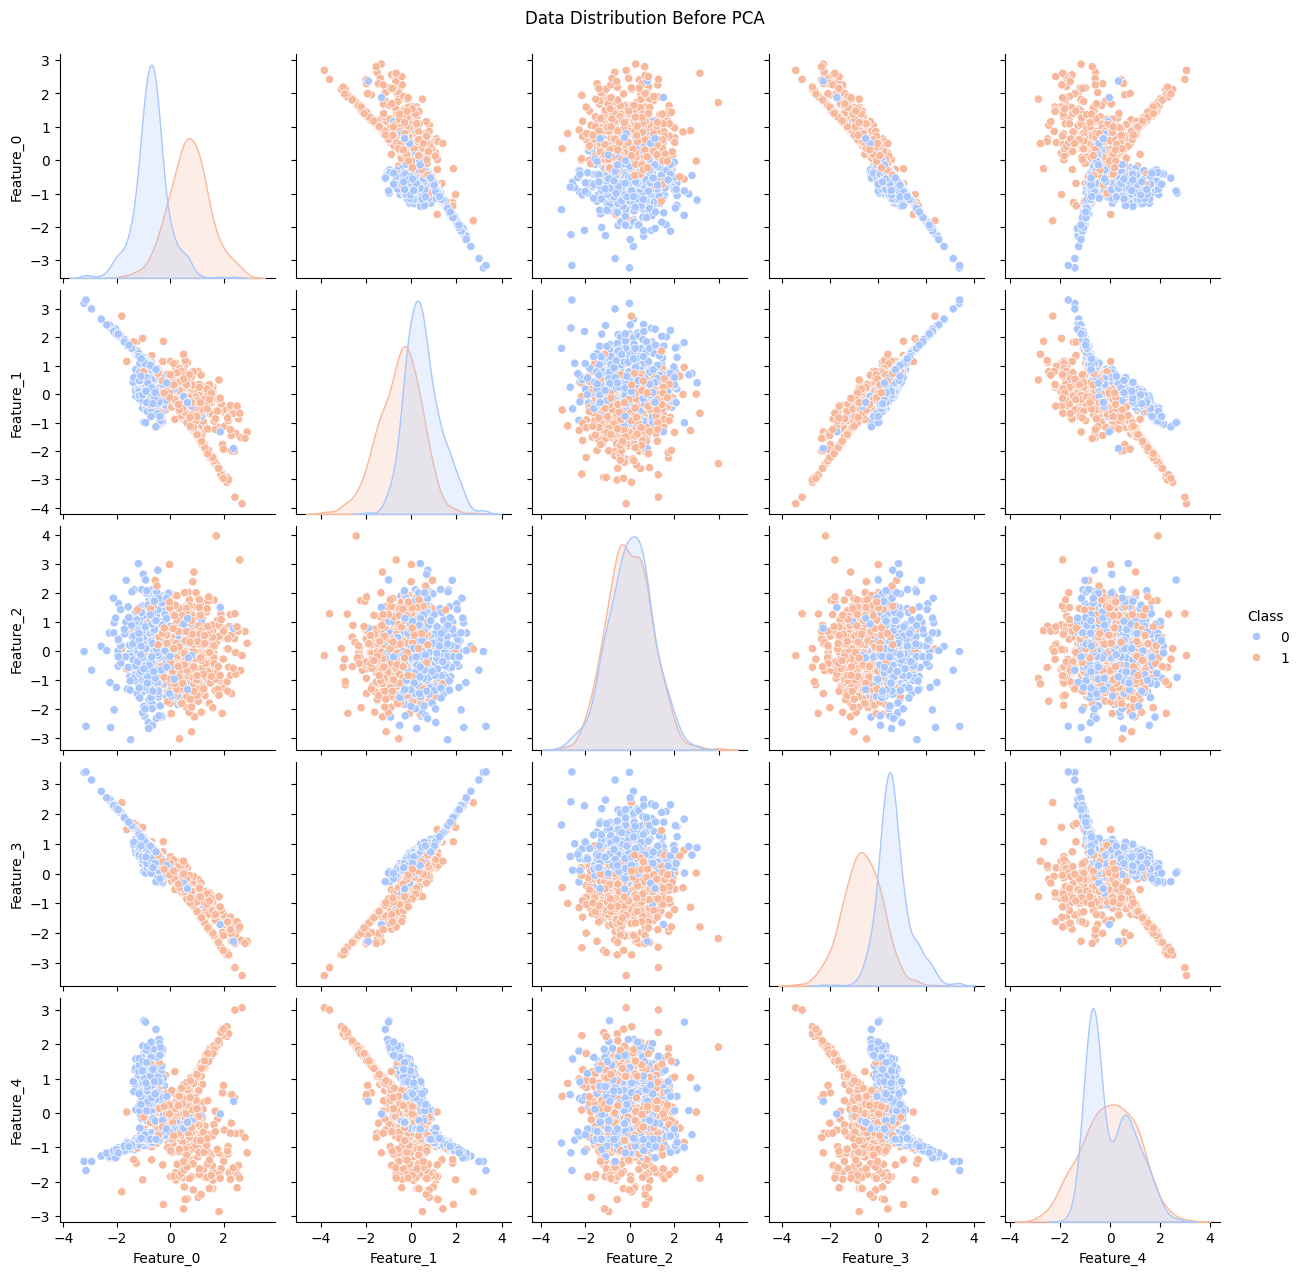

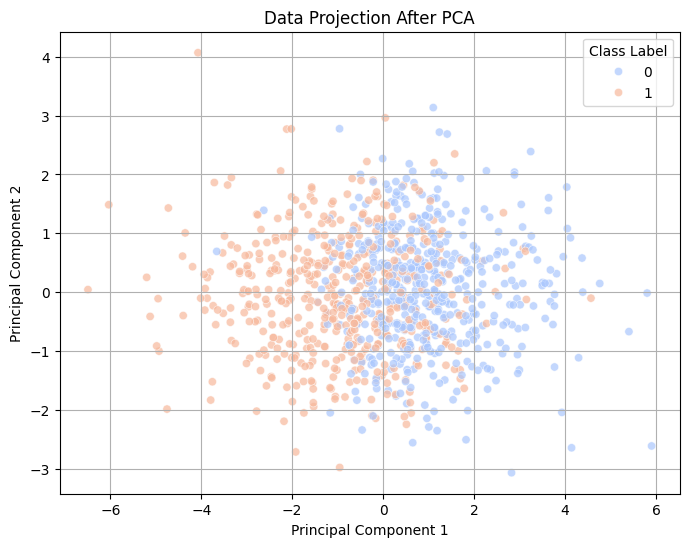

In [ ]:
###40.  Train a PCA model and visualize how data points are transformed before and after PCA


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

# Generate a dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reducing to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for visualization
df_original = pd.DataFrame(X_scaled, columns=[f'Feature_{i}' for i in range(X_scaled.shape[1])])
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Add labels for color coding
df_original['Class'] = y
df_pca['Class'] = y

sns.pairplot(df_original, hue='Class', palette='coolwarm')
plt.suptitle("Data Distribution Before PCA", y=1.02)
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Class'], palette='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data Projection After PCA")
plt.legend(title="Class Label")
plt.grid(True)
plt.show()


In [ ]:
###41.  Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

X,y = load_wine(return_X_y=True)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = KNeighborsClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"classification_report {classification_report(y_test,y_pred)}")

classification_report               precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       0.47      0.57      0.52        14
           2       0.33      0.15      0.21        13

    accuracy                           0.53        36
   macro avg       0.50      0.58      0.51        36
weighted avg       0.48      0.53      0.48        36



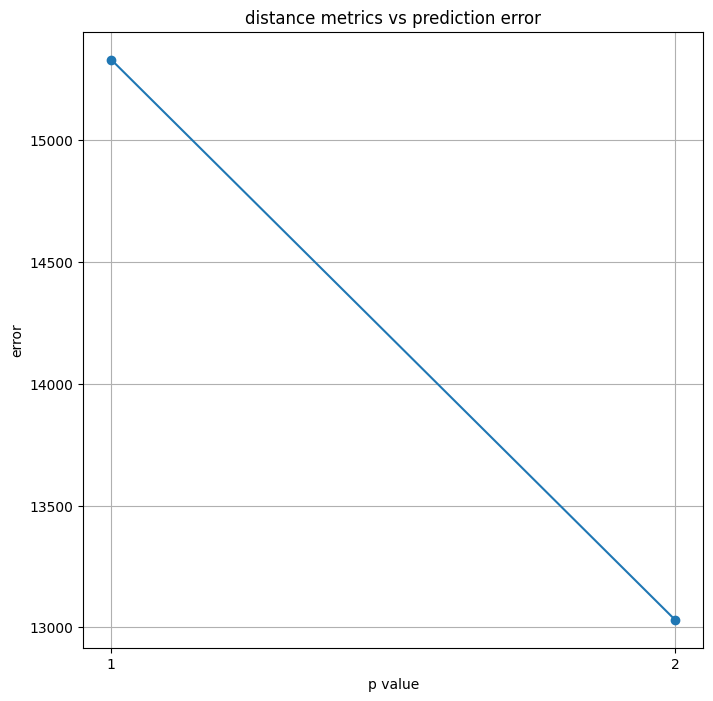

In [ ]:
###42.  Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

warnings.filterwarnings('ignore')

X,y = make_regression(n_features=20,n_samples=1000,noise=0.1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

p = [1,2]
error ={}
for metric in p:
  reg = KNeighborsRegressor(metric='minkowski',p=metric)
  reg.fit(X_train,y_train)
  y_pred = reg.predict(X_test)
  error[metric] = mean_squared_error(y_test,y_pred)

plt.figure(figsize=(8,8))
plt.plot(p,list(error.values()),marker ='o',linestyle='-')
plt.xlabel('p value')
plt.ylabel('error')
plt.xticks(p)
plt.title('distance metrics vs prediction error')
plt.grid(True)
plt.show()

In [ ]:
###43.  Train a KNN Classifier and evaluate using ROC-AUC score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

warnings.filterwarnings('ignore')

X,y = load_iris(return_X_y=True)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = KNeighborsClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)

print(f"roc_auc_score {roc_auc_score(multi_class='ovr',y_true=y_test,y_score=y_pred)}")

roc_auc_score 0.9759710151867015


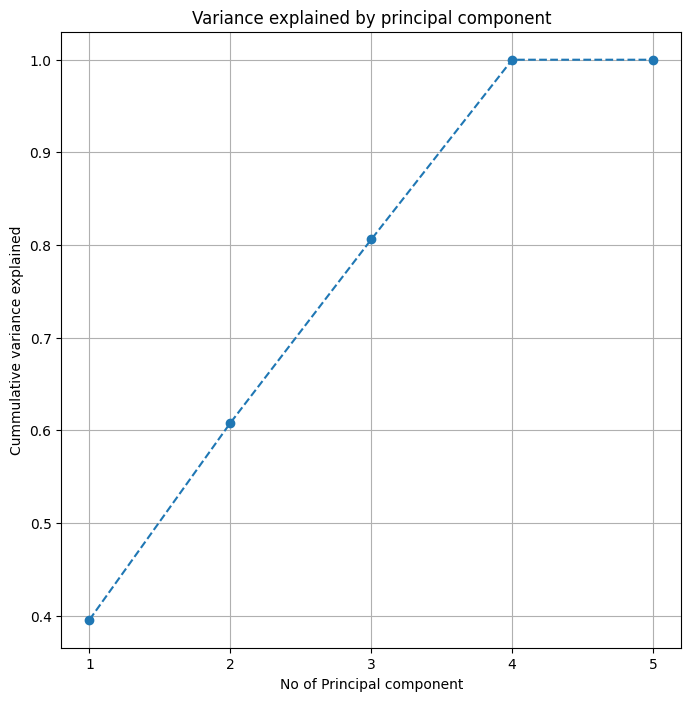

In [4]:
###44.  Train a PCA model and visualize the variance captured by each principal component

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

X,y = make_classification(n_samples=2000,n_features=5,n_redundant=1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#variance explained by each principal component
variance = pca.explained_variance_ratio_
cumm_variance = np.cumsum(variance)

plt.figure(figsize=(8,8))
plt.plot(range(1,len(cumm_variance)+1),cumm_variance,marker='o',linestyle='--')
plt.xlabel('No of Principal component')
plt.ylabel('Cummulative variance explained')
plt.title('Variance explained by principal component')
plt.xticks(range(1,len(cumm_variance)+1))
plt.grid(True)
plt.show()

In [ ]:
###45.  Train a KNN Classifier and perform feature selection before training

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

warnings.filterwarnings('ignore')

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_redundant=2, random_state=42)

# Perform feature selection
selector = SelectKBest(mutual_info_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train KNN Classifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after feature selection: {accuracy:.4f}")


Accuracy after feature selection: 0.8700


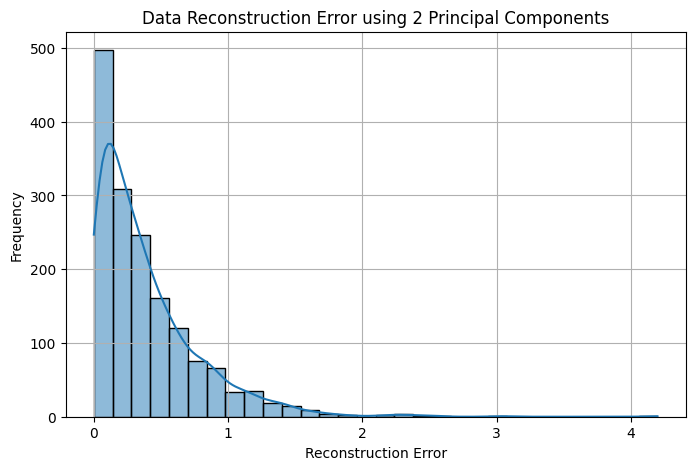

In [9]:
###46.  Train a PCA model and visualize the data reconstruction error after reducing dimensions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

X,y = make_classification(n_samples=2000,n_features=5,n_redundant=1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


X_train_reconstructed = pca.inverse_transform(X_train_pca)

# Compute reconstruction error (Mean Squared Error)
reconstruction_error = np.mean((X_train - X_train_reconstructed) ** 2, axis=1)

plt.figure(figsize=(8, 5))
sns.histplot(reconstruction_error, bins=30, kde=True)
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title(f"Data Reconstruction Error using 2 Principal Components")
plt.grid()
plt.show()

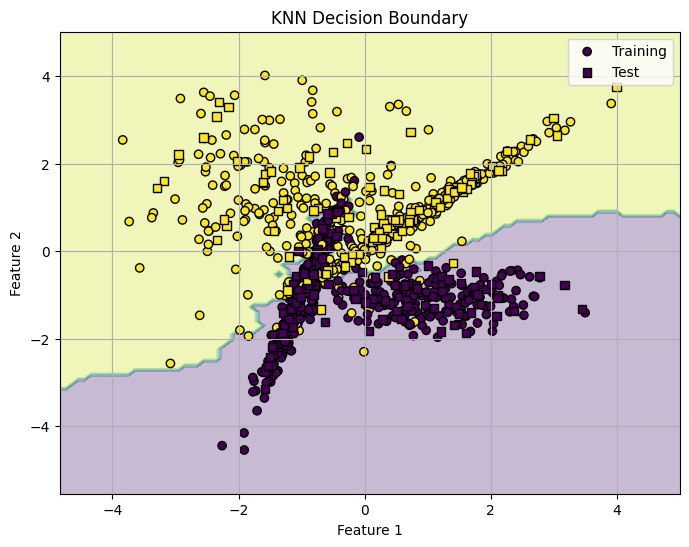

In [ ]:
###47.  Train a KNN Classifier and visualize the decision boundary

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(n_features=2, n_samples=1000, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label="Training")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label="Test")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


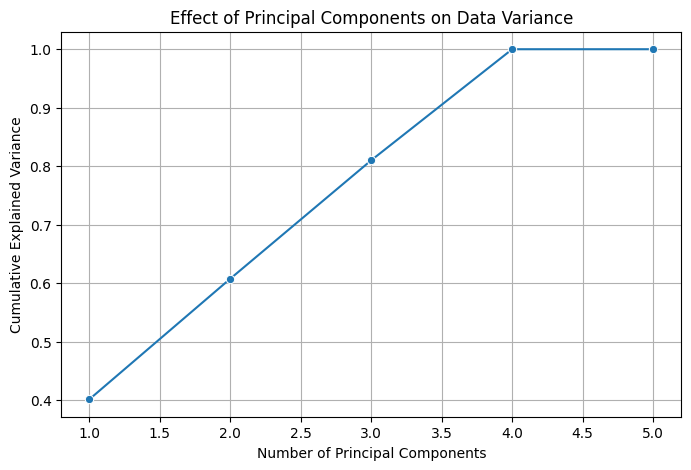

In [10]:
###48.  Train a PCA model and analyze the effect of different numbers of components on data variance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

X, y = make_classification(n_samples=2000, n_features=5, n_redundant=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA without specifying number of components to analyze variance
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, len(explained_variance_ratio) + 1), y=np.cumsum(explained_variance_ratio), marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Effect of Principal Components on Data Variance")
plt.grid()
plt.show()